In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
df = pd.read_csv("Medical_insurance.csv")

In [38]:
df.head()

,id,age,gender,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [39]:
df.shape

(2772, 8)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 8 columns):
id          2772 non-null int64
age         2772 non-null int64
gender      2772 non-null object
bmi         2772 non-null float64
children    2772 non-null int64
smoker      2772 non-null object
region      2772 non-null object
charges     2772 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 173.3+ KB


In [41]:
df.isnull().sum()

id          0
age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [42]:
df.columns

Index(['id', 'age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [43]:
df = df.drop(columns=['id'])

In [44]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


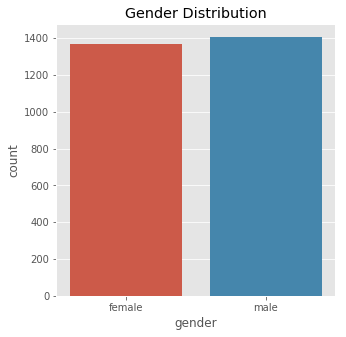

In [45]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

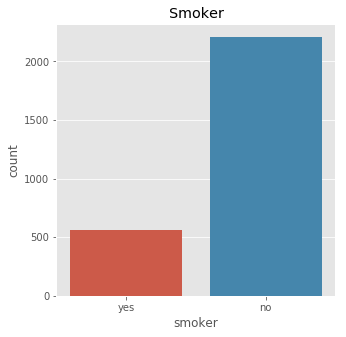

In [46]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

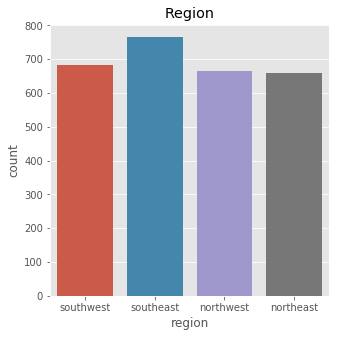

In [47]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

Text(0.5,1,'Cost vs Region')

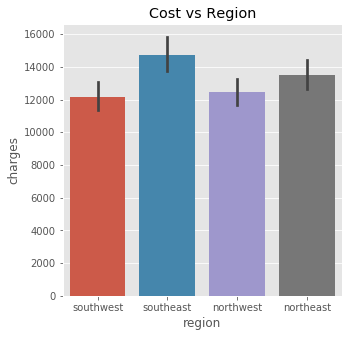

In [48]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Cost vs Region')

Text(0.5,1,'Charges for smokers')

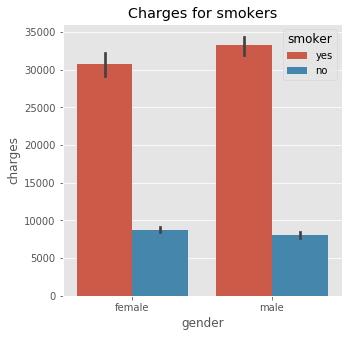

In [49]:
plt.figure(figsize=(5,5))
sns.barplot(x='gender', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

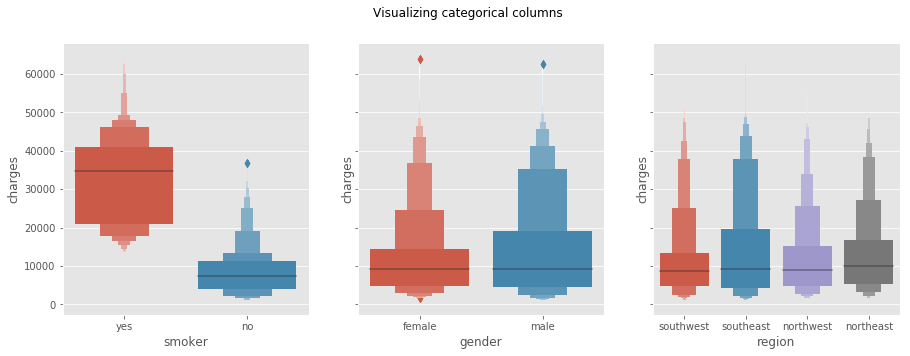

In [50]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=df, ax=axes[0])
sns.boxenplot(x='gender', y= 'charges', data=df, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=df, ax=axes[2])

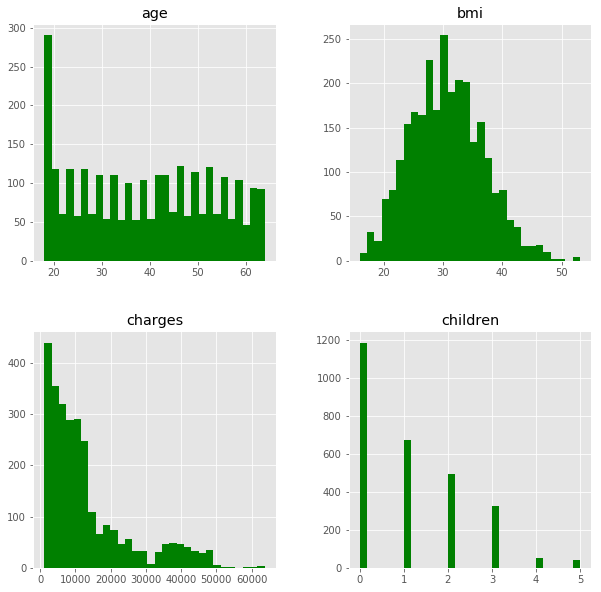

In [51]:
df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='green')
plt.show()

In [52]:
df.head(20)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [53]:
df['gender'] = df['gender'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [54]:
df.head(20)

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
5,31,1,25.740,0,0,2,3756.62160
6,46,1,33.440,1,0,2,8240.58960
7,37,1,27.740,3,0,3,7281.50560
8,37,0,29.830,2,0,4,6406.41070
9,60,1,25.840,0,0,3,28923.13692


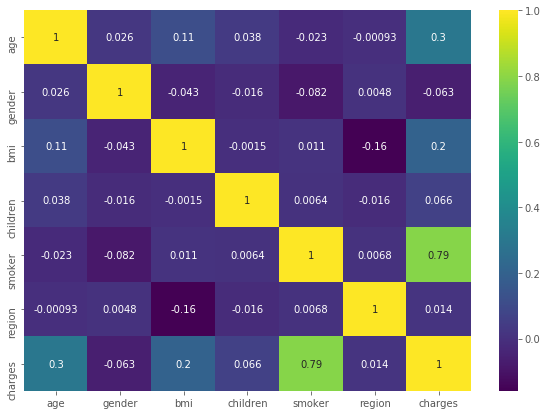

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True,cmap = 'viridis')
plt.show()

In [56]:
X = df.drop(['charges', 'gender'], axis=1)
y = df.charges
     

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1940, 5)
X_test shape:  (832, 5)
y_train shpae:  (1940,)
y_test shape:  (832,)


In [58]:
linreg = LinearRegression()

In [59]:
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)

In [60]:
from sklearn.metrics import r2_score

In [61]:
print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.7442072144074348


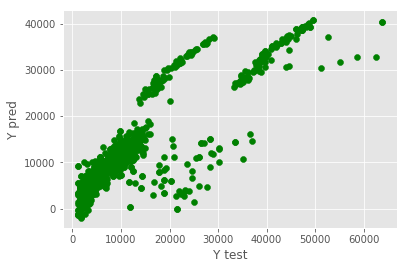

In [62]:
plt.scatter(y_test, pred,color='green')
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [63]:

data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [64]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [33324.01111126]
